In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import glob
import os
def sortKeyFunc(s):
    return int(os.path.basename(s)[4:-4])

def readTrainData(file):
    files = glob.glob('IOP/' + file + '/*.csv')
    files.sort(key=sortKeyFunc) 
    
    l = len(files)
    data = np.zeros((l,1000,99))
    for k, file in enumerate(files):
        cell = np.genfromtxt(file,delimiter=',')
        data[k,:,:] = cell 
    
    return data

In [3]:
train_data_org = readTrainData('train')
test_data_org = readTrainData('test')


In [4]:
train_data_org.shape

(41, 1000, 99)

In [5]:
def readTestData(file):
    files = np.log10(np.genfromtxt('IOP/cycle_lives/'+file+'_cycle_lives.csv'))
    return files
train_out = readTestData('train')
test_out = readTestData('test')



In [6]:
train_data = (train_data_org[:, ::10, 98]) - (train_data_org[:, ::10, 8])
test_data = (test_data_org[:, ::10, 98]) -(test_data_org[:, ::10, 8])


In [7]:
test_data = np.concatenate([test_data[:21], test_data[22:]])
test_out = np.concatenate([test_out[:21], test_out[22:]])

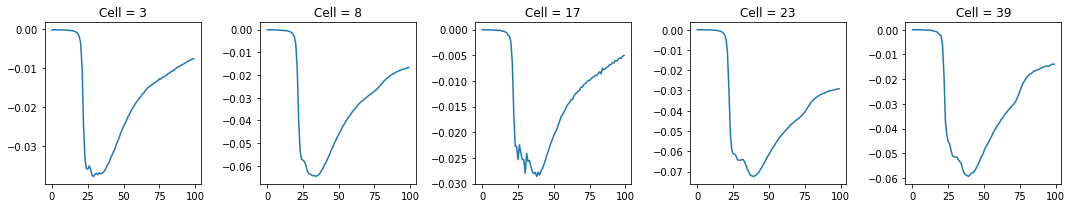

In [8]:
plot_idx = [3, 8, 17, 23, 39]
fig, axs = plt.subplots(1,5)
for i, ax, in enumerate(axs.flatten()):
    ax.plot(train_data[plot_idx[i]])
    ax.set_title("Cell = %i" %plot_idx[i])
fig.set_size_inches(15,3)
fig.tight_layout()

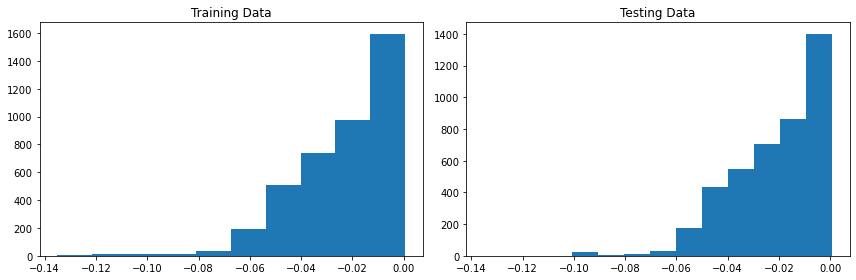

In [9]:
fig, axs = plt.subplots(1,2, sharex=True)
axs[0].hist(train_data.flatten())
axs[0].set_title('Training Data')

axs[1].hist(test_data.flatten())
axs[1].set_title('Testing Data')

fig.set_size_inches(12,4)
fig.tight_layout()

In [10]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor.fit(train_data, train_out)

# Predicting a new result
train_pred_rf= regressor.predict(train_data)

In [11]:
from sklearn.metrics import r2_score
print(r2_score(train_pred_rf,train_out))

0.9312545271366995


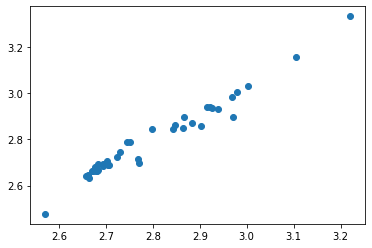

In [12]:
plt.scatter(train_pred_rf,train_out)
plt.show()

In [13]:
test_pred_rf = regressor.predict(test_data)
print(r2_score(test_pred_rf,test_out))

0.74325556714481


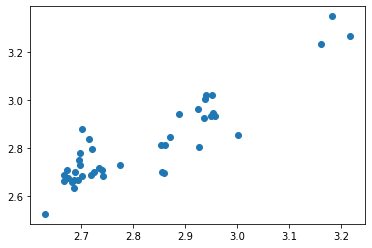

In [14]:
plt.scatter(test_pred_rf,test_out)
plt.show()

In [15]:
from sklearn.ensemble import AdaBoostRegressor
adb_r = AdaBoostRegressor(n_estimators = 300)
adb_r.fit(train_data, train_out)
train_pred_adb = adb_r.predict(train_data)



In [16]:
from sklearn.metrics import r2_score
print(r2_score(train_pred_adb,train_out))

0.973885575108094


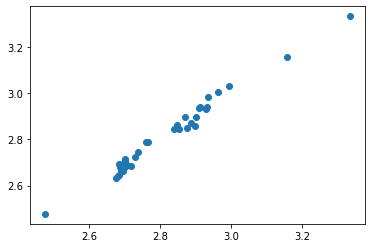

In [17]:
plt.scatter(train_pred_adb,train_out)
plt.show()

In [18]:
test_pred_adb = adb_r.predict(test_data)
print(r2_score(test_pred_adb,test_out))

0.8122237890083324


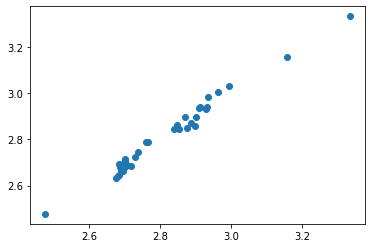

In [19]:
plt.scatter(train_pred_adb,train_out)
plt.show()